In [1]:
# Add intercept 
import numpy as np
def add_intercept(X):
    """ Returns: New matrix same as X with 1's in the 0th column. """
    new_X = X.to_numpy()
    new_X = np.zeros((X.shape[0], X.shape[1]+1), dtype = np.float)
    new_X[:, 0] = 1
    new_X[:,1:] = X
    new_X = pd.DataFrame(new_X)

    return new_X

In [2]:
import pandas as pd

#load data
train_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds1_train.csv"
eval_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds1_valid.csv"

f_train = pd.read_csv(train_path)
y_train = f_train["y"]
X_train = f_train.drop(axis=1, columns="y")

f_eval = pd.read_csv(eval_path)
y_val = f_eval["y"]
X_val = f_eval.drop(axis=1, columns="y")

In [3]:
class GDA(object):

    def fit(self, X, y): # X should not have the intercept term    
        d = X.copy()
        d["y"] = y
        #print(d)
           
        x_y1 = d[d["y"]==1]
        x_y0 = d[d["y"]==0]     
        x_y1 = x_y1.drop(axis=1, columns="y")
        x_y0 = x_y0.drop(axis=1, columns="y")
        #print(x0)

        #find phi, u_0, u_1 and sigma 
        m, n = X.shape
        phi = y.sum()/m
        #print(y.sum())
        #print(phi)
      
        u_0 = x_y0.sum()/y.sum()
        u_1 = x_y1.sum()/y.sum()
        #print(u_0)
        #print(u_1)
        
        diff = d.copy()
        
        #print(diff[diff["y"]==0])
        #print(diff[diff["y"]==0]["x_1"])
        #print(diff[diff["y"]==0]["x_1"]-u_0[0])
        
        diff_y0_x1 = pd.DataFrame()
        diff_y0_x2 = pd.DataFrame()
        diff_y0_x1["x_1"] = diff[diff["y"]==0]["x_1"] - u_0[0]
        diff_y0_x2["x_2"] = diff[diff["y"]==0]["x_2"] - u_0[1]
        
        diff_y1_x1 = pd.DataFrame()
        diff_y1_x2 = pd.DataFrame()
        diff_y1_x1["x_1"] = diff[diff["y"]==1]["x_1"] - u_1[0]
        diff_y1_x2["x_2"] = diff[diff["y"]==1]["x_2"] - u_1[1]
      
        diff = pd.DataFrame()
        diff = pd.concat([diff_y0_x1, diff_y1_x1])
        diff["x_2"] = pd.concat([diff_y0_x2, diff_y1_x2])
        #print(diff)

        diff = diff.to_numpy()
        sigma = (1/m)*diff.T.dot(diff)
        #print(sigma)

        #Write theta in terms of the parameters
        from numpy.linalg import inv
        sigma_inv = inv(sigma)
        
        u_0 = u_0.to_numpy()
        u_1 = u_1.to_numpy()
        theta = inv(sigma).dot(u_1 - u_0)

        #print(theta)
        theta0 = (1/2)*(u_0.T.dot(sigma_inv).dot(u_0) - u_1.T.dot(sigma_inv).dot(u_1)) - np.log((1-phi)/phi)
        theta0 = np.array([theta0])
        theta = np.hstack([theta0, theta])
        self.theta = theta
        return theta

    def predict(self, X):
        sigmoid = lambda z: 1/(1+np.exp(-z))
        X = add_intercept(X)
        #print(X)
        X = X.to_numpy()
        probs = sigmoid(X.dot(self.theta))
        preds = (probs >= 0.5).astype(np.int)
        return preds

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

#train a GDA classifier
model = GDA()
model.fit(X_train, y_train)
print(model.theta)

[-6.17158405  2.22055506 -0.01763375]


In [5]:
# Plot decision boundary on top of validation set 
y_pred = model.predict(X_val)

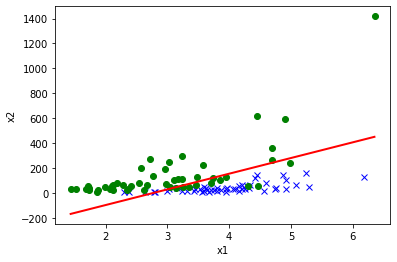

In [12]:
d_val = X_val.copy()
d_val["y"] = y_val
#print(d_val)

plt.plot(d_val[d_val["y"]==1]["x_1"], d_val[d_val["y"]==1]["x_2"], "bx")
plt.plot(d_val[d_val["y"]==0]["x_1"], d_val[d_val["y"]==0]["x_2"], "go")
plt.xlabel("x1")
plt.ylabel("x2")

# Plot decision boundary (found by solving for theta^T x = 0)
theta = model.theta
X_val = X_val.to_numpy()
x1 = np.arange(min(X_val[:, -2]), max(X_val[:, -2]), 0.01)
x2 = -(theta[0]/theta[2] * 1+theta[1]/theta[2]*x1)
plt.plot(x1, x2, c='red', linewidth=2)

plt.show()
